<div style="font-weight: bold; color:#5D8AA8" align="center">
    <div style="font-size: xx-large">Natural Language Processing 2021-22</div><br>
    <div style="font-size: x-large; color:gray">Aspect opinion extraction</div><br>
    <div style="font-size: large">María Barroso - Gloria del Valle</div><br></div><hr>
</div>

In [11]:
import loader as LD
import manager as MG

%load_ext autoreload
%autoreload 2

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/glorelvalle/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


## Assignment 1: Review datasets

You are provided with a JSON file `yelp_hotels.json` containing 5,034 reviews generated by 4,148 Yelp users about 284 hotels.

You also have two additional JSON files `yelp_beauty_spas.json` and `yelp_restaurants.json` which contain Yelp reviews about beauty/spa resorts and restaurants.

Each review (JSON record) has the following fields:
* *reviewerID*: the identifier of the user who wrote the review
* *asin*: the identifier of the reviewed hotel
* *reviewText*: the text of the user’s review about the hotel
* *overall*: the 1-5 Likert scale rating assigned by the user to the hotel

### Task 1.1 (mandatory)
Loading all the hotel reviews from the Yelp hotel reviews file.

In [12]:
reviews_hotels = LD.load_all_json_yelp('yelp_hotels')

yelp_hotels: 5034 reviews loaded


We show a row example from this dataset.

In [3]:
print(reviews_hotels[0])

{'reviewerID': 'qLCpuCWCyPb4G2vN-WZz-Q', 'asin': '8ZwO9VuLDWJOXmtAdc7LXQ', 'summary': 'summary', 'reviewText': "Great hotel in Central Phoenix for a stay-cation, but not necessarily a place to stay out of town and without a car. Not much around the area, and unless you're familiar with downtown, I would rather have a guest stay in Old Town Scottsdale, etc. BUT if you do stay here, it's awesome. Great boutique rooms. Awesome pool that's happening in the summer. A GREAT rooftop patio bar, and a very very busy lobby with Gallo Blanco attached. A great place to stay, but have a car!", 'overall': 4.0}


### Task 1.2
Loading line by line the reviews from the Yelp beauty/spa resorts and restaurants reviews files

In [4]:
reviews_spas = LD.load_by_line_json_yelp('yelp_beauty_spas')
print(reviews_spas[0])

yelp_beauty_spas: 5580 reviews loaded
{'reviewerID': 'Xm8HXE1JHqscXe5BKf0GFQ', 'asin': 'WGNIYMeXPyoWav1APUq7jA', 'summary': 'summary', 'reviewText': "Good tattoo shop. Clean space, multiple artists to choose from and books of their work are available for you to look though and decide who's style most mirrors what you're looking for. I chose Jet to do a cover-up for me and he worked with me on the design and our ideas and communication flowed very well. He's a very personable guy, is friendly and keeps the conversation going while he's working on you, and he doesn't dick around (read: He starts to work and continues until the job is done). He's very professional and informative. Good customer service combines with talent at the craft.", 'overall': 4.0}


In [4]:
reviews_restaurants = LD.load_by_line_json_yelp('yelp_restaurants')
print(reviews_restaurants[0])

yelp_restaurants: 158431 reviews loaded
{'reviewerID': 'rLtl8ZkDX5vH5nAx9C3q5Q', 'asin': '9yKzy9PApeiPPOUJEtnvkg', 'summary': 'summary', 'reviewText': 'My wife took me here on my birthday for breakfast and it was excellent. The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure. Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning. It looked like the place fills up pretty quickly so the earlier you get here the better.Do yourself a favor and get their Bloody Mary. It was phenomenal and simply the best I\'ve ever had. I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it. It was amazing.While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious. It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete. It was the best "toast" I\'ve ever had.An

### Task 1.3
Loading line by line* reviews on other domains like Books from McAuley’s Amazon dataset.


In [5]:
reviews_books = LD.load_huge_file('Books_5', 'amazon', limit=80000)
print(reviews_books[0])

Books_5: 80000 reviews loaded
{'reviewerID': 'A2S166WSCFIFP5', 'asin': '000100039X', 'reviewerName': 'adead_poet@hotmail.com "adead_poet@hotmail.com"', 'helpful': [0, 2], 'reviewText': "This is one my must have books. It is a masterpiece of spirituality. I'll be the first to admit, its literary quality isn't much. It is rather simplistically written, but the message behind it is so powerful that you have to read it. It will take you to enlightenment.", 'overall': 5.0, 'summary': 'close to god', 'unixReviewTime': 1071100800, 'reviewTime': '12 11, 2003'}


## Assignment 2: Aspect vocabularies

### Task 2.1 (mandatory)
Loading (and printing on screen) the vocabulary of the aspects_hotels.csv
file, and directly using it to identify aspect references in the reviews. In particular, the aspects terms
could be mapped by exact matching with nouns appearing in the reviews. 

In [15]:
aspects_hotels = LD.load_aspects('aspects_hotels')

We show an example of values returning from this aspects.

In [7]:
aspects_hotels.get('amenities')

['amenities', 'services']

### Task 2.2 

Generating or extending the lists of terms of each aspect with synonyms extracted from WordNet.

In [8]:
aspects_hotels = MG.extend_aspects(aspects_hotels)

We show an extended version of first example.

In [9]:
aspects_hotels.get('amenities')

['agreeableness',
 'amenities',
 'amenity',
 'creature_comforts',
 'conveniences',
 'comforts',
 'services']

### Task 2.3 
Managing vocabularies for additional Yelp or Amazon domains.

In [10]:
aspects_spas = LD.load_aspects('aspects_spas')
aspects_spas = MG.extend_aspects(aspects_spas)
aspects_spas.get('atmosphere')

['atmospheres',
 'ambiance',
 'lights',
 'atmosphere',
 'standard_atmosphere',
 'standard_pressure',
 'ambiances',
 'atmospheric_state',
 'air',
 'atm',
 'lighting',
 'aura',
 'ambiences',
 'ambience',
 'music',
 'light']

In [11]:
aspects_restaurants = LD.load_aspects('aspects_restaurants')
aspects_restaurants = MG.extend_aspects(aspects_restaurants)
aspects_restaurants.get('appetizers')

['appetizer',
 'appetiser',
 'appetizers',
 'starter',
 'starters',
 'entrees',
 'entree']

### Task 2.4
Identifying hidden/implicit aspect references in reviews. For instance, the example review of page 1 has references to the hotel’s location and transportation aspects, since there is “not much around the area” and "going by car to the hotel is recommendable".

In [43]:
implicit_aspects = MG.run(reviews_hotels)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/glorelvalle/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [58]:
implicit_aspects[105]

{'reviewer_id': '59pVYStY0yKpRmODFIfDww',
 'hotel_id': 'Hgl5RjvLS_Yc8cqdw9uaOA',
 'review_text': "the scenery was amazing!! wooooooooo!! - well thats my biggest impression of this place. if you're looking for a great place to golf, i suggest you swing by this place. they give you 5 stars customer service and making sure that you're having the best time of your life.",
 'aspects': [('impression', 'biggest', 0.0, 1),
  ('place', 'great', 0.6249, 1),
  ('time', 'best', 0.6369, 1),
  ('scenery', 'amazing', 0.5859, 3)],
 'overall': 5.0}

In [55]:
implicit_aspects[1008]

{'reviewer_id': 'lCVLT95VUnlZfboVoZJCZA',
 'hotel_id': '8x9Mzb7gX6SEHQIlSDpU8w',
 'review_text': 'my company recently hosted an event here at the showroom and the staff were super helpful and accommodating. the vent went off without a hitch and they worked with all our requests, even the strange ones. it was nice to feel like a client who mattered, and not just another sale - we could tell the staff really wanted us to be happy with our event.',
 'aspects': [('ones', 'strange', -0.2023, 1),
  ('staff', 'helpful', 0.4215, 3),
  ('company', 'recently', 0.0, 4)],
 'overall': 4.0}

## Assignment 3: Opinion Lexicon

### Task 3.1

Loading Liu’s opinion lexicon composed of positive and negative words, accessible as an NLKT corpus, and exploiting it to assign the polarity values to aspect opinions in assignment 4. Instead of this lexicon, you are allowed to use others, such as SentiWordNet.

In [7]:
import opinion_lexicon as OP
import spacy
import nltk
import pandas as pd

In [3]:
file = nltk.data.load("vader_lexicon/vader_lexicon.txt")
nlp = spacy.load("en_core_web_lg")

In [4]:
lexicon = {}
for l in file.split("\n"):
    word, polarity = l.strip().split("\t")[0:2]
    lexicon[word] = float(polarity)

In [5]:
lexicon

{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [6]:
from spacy import displacy

doc = nlp("I do not think the hotel staff was friendly")
displacy.render(doc, style="dep")

### Task 3.2

Considering modifiers to adjust the polarity values of the aspect opinions in Assignment 4. The modifiers to use could be those provided with the NLTK Sentiment Analyzer (see Appendix G) and/or those given in modifiers.csv.

In [61]:
modifiers = pd.read_csv("modifiers/modifiers.csv", header = None, names=['modifier', 'value'] )
modifiers

,modifier,value
0,above,2.0
1,absolutely,2.0
2,abundantly,2.0
3,acutely,2.0
4,amazingly,2.0
...,...,...
295,violently,-1.0
296,whimsically,-1.0
297,wickedly,-1.0
298,wretchedly,-1.0


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import VaderConstants

constants = VaderConstants()
print(constants.BOOSTER_DICT)

{'absolutely': 0.293, 'amazingly': 0.293, 'awfully': 0.293, 'completely': 0.293, 'considerably': 0.293, 'decidedly': 0.293, 'deeply': 0.293, 'effing': 0.293, 'enormously': 0.293, 'entirely': 0.293, 'especially': 0.293, 'exceptionally': 0.293, 'extremely': 0.293, 'fabulously': 0.293, 'flipping': 0.293, 'flippin': 0.293, 'fricking': 0.293, 'frickin': 0.293, 'frigging': 0.293, 'friggin': 0.293, 'fully': 0.293, 'fucking': 0.293, 'greatly': 0.293, 'hella': 0.293, 'highly': 0.293, 'hugely': 0.293, 'incredibly': 0.293, 'intensely': 0.293, 'majorly': 0.293, 'more': 0.293, 'most': 0.293, 'particularly': 0.293, 'purely': 0.293, 'quite': 0.293, 'really': 0.293, 'remarkably': 0.293, 'so': 0.293, 'substantially': 0.293, 'thoroughly': 0.293, 'totally': 0.293, 'tremendously': 0.293, 'uber': 0.293, 'unbelievably': 0.293, 'unusually': 0.293, 'utterly': 0.293, 'very': 0.293, 'almost': -0.293, 'barely': -0.293, 'hardly': -0.293, 'just enough': -0.293, 'kind of': -0.293, 'kinda': -0.293, 'kindof': -0.293,

## Assignment 4: Aspect opinions

Once the aspect vocabulary and opinion lexicons are loaded, the opinions about aspects have to be extracted
from the reviews. For this purpose, POS tagging, constituency and dependency parsing could be used.
- POS tagging would allow identifying the adjectives in the sentences.
- Constituency and dependency parsing would allow extracting the relations between nouns and adjectives and adverbs.

#### Task 4.1 : 
Extracting the [aspect, aspect term, opinion word, polarity] tuples from the input reviews

In [19]:
idx = 0
review = reviews_hotels[idx].get("reviewText")
print(review)

data = OP.analyze_review(idx, review, aspects_hotels)
data

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/glorelvalle/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/glorelvalle/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/glorelvalle/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/glorelvalle/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Great hotel in Central Phoenix for a stay-cation, but not necessarily a place to stay out of town and without a car. Not much around the area, and unless you're familiar with downtown, I would rather have a guest stay in Old Town Scottsdale, etc. BUT if you do stay here, it's awesome. Great boutique rooms. Awesome pool that's happening in the summer. A GREAT rooftop patio bar, and a very very busy lobby with Gallo Blanco attached. A great place to stay, but have a car!


,aspect,opinion_word,aspect_term,polarity
review_id,,,,
0,SHOPPING,great,boutique rooms,1.0
0,POOL,awesome,pool,1.0
0,BAR,great,rooftop patio bar,1.0
0,BUILDING,very very busy,lobby,1.0


In [20]:
total_data = pd.DataFrame(columns = ['aspect', 'opinion_word', 'aspect_term', 'polarity'])
for idx in range(len(reviews_hotels)):
    review = reviews_hotels[idx].get("reviewText")
    data = OP.analyze_review(idx, review, aspects_hotels)
    total_data = total_data.append(data)
total_data

,aspect,opinion_word,aspect_term,polarity
0,SHOPPING,great,boutique rooms,1.0
0,POOL,awesome,pool,1.0
0,BAR,great,rooftop patio bar,1.0
0,BUILDING,very very busy,lobby,1.0
1,DRINKS,cheap,beer,0.0
...,...,...,...,...
5030,SERVICE,very slowthey free,wifi internet service,1.0
5031,LOCATION,beautiful,view,1.0
5031,STAFF,"friendly, courteous",hotel staff,1.0
5032,LOCATION,beautiful,view,1.0


## Assignment 5: Opinion summarization

To validate and evaluate the solutions implemented in previous tasks, you are finally proposed the following tasks:

• Task 5.1 - mandatory: visualizing on screen the aspect opinions (tuples) of a given review

• Task 5.2 - mandatory: visualizing on screen a summary of the aspect opinions of a given item. Among other issues, the total number of positive/negative opinions for each aspect of the item could be
visualized

• Task 5.3 - optional [low]: conducting and reporting a manual evaluation of the implemented aspect
opinion approach

o Precision can be computed by checking the correctness of extracted aspect opinion tuples

o Recall can be computed by checking whether real aspect opinions were not extracted by the
implemented approach

In [21]:
aspect = 'BAR'
total_data[total_data['aspect']==aspect].rename_axis('review_id')

,aspect,opinion_word,aspect_term,polarity
review_id,,,,
0,BAR,great,rooftop patio bar,1.0
24,BAR,also great,bar,1.0
73,BAR,mini,bar,0.0
118,BAR,small,lobby bar,-1.0
180,BAR,"wonderful daily, clean",breakfast bar,1.0
...,...,...,...,...
5001,BAR,female,bartender,0.0
5001,BAR,top,bar,1.0
5007,BAR,downstairs great,bartenders,1.0


In [22]:
df_polarity = total_data.groupby('polarity').size().reset_index(name='count').set_index('polarity')
df_polarity

,count
polarity,
-1.0,1997
0.0,2657
1.0,8425


<AxesSubplot:xlabel='polarity'>

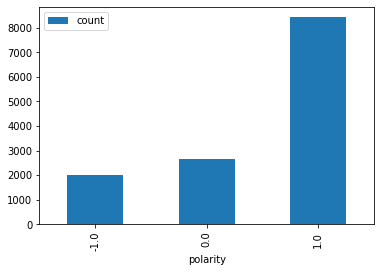

In [23]:
df_polarity.plot.bar()

In [24]:
df_polarity_review = total_data.rename_axis('review_id').reset_index().groupby(['review_id', 'polarity']).size().reset_index(name='counts').set_index('review_id')
df_polarity_review

,polarity,counts
review_id,,
0,1.0,4
1,0.0,1
2,1.0,5
3,0.0,1
3,1.0,2
...,...,...
5029,0.0,1
5029,1.0,4
5030,1.0,1


In [25]:
df_aspect = total_data.groupby('aspect').size().reset_index(name='count').set_index('aspect')
df_aspect

,count
aspect,
AMENITIES,48
ATMOSPHERE,330
BAR,388
BATHROOMS,586
BEDROOMS,987
BOOKING,26
BREAKFAST,921
BUILDING,907
CHECKING,135


<AxesSubplot:xlabel='aspect'>

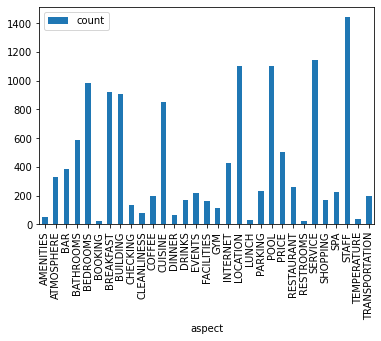

In [26]:
df_aspect.plot.bar()

In [27]:
df_aspect_polarity = total_data.groupby(['aspect','polarity']).size().reset_index(name='counts').set_index(['aspect','polarity'])
df_aspect_polarity

counts
aspect         polarity        
AMENITIES      -1.0           3
                0.0           1
                1.0          44
ATMOSPHERE     -1.0          51
                0.0          92
...                         ...
TEMPERATURE     0.0          10
                1.0          17
TRANSPORTATION -1.0          24
                0.0          61
                1.0         112

[93 rows x 1 columns]

/usr/local/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


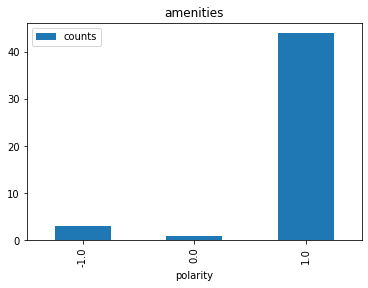

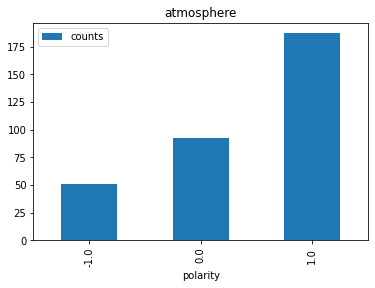

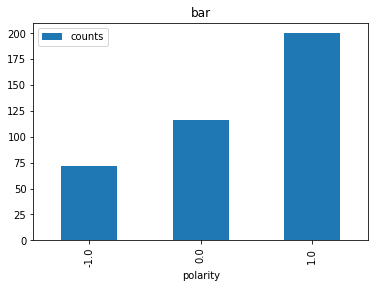

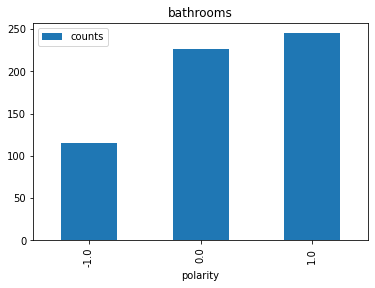

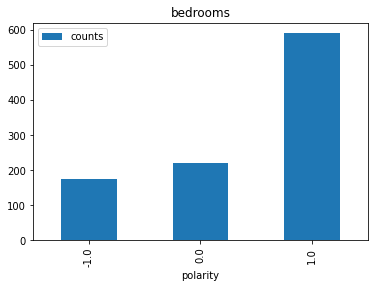

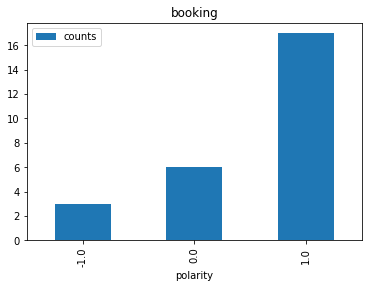

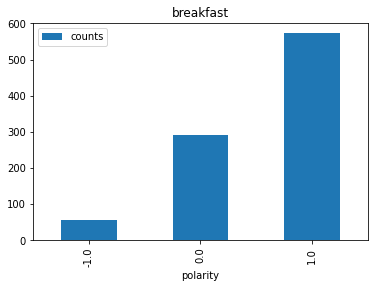

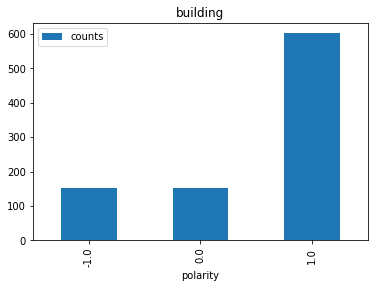

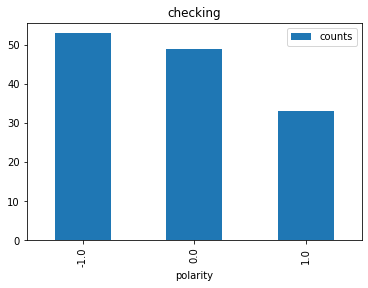

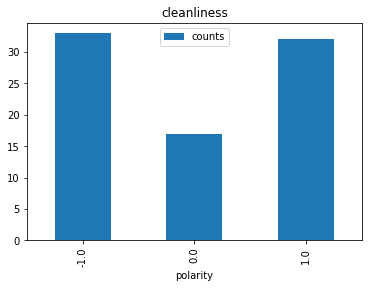

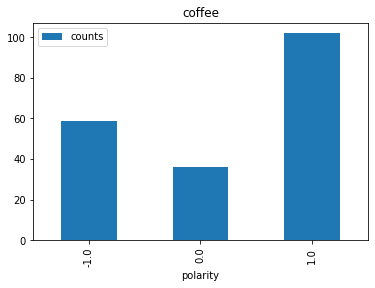

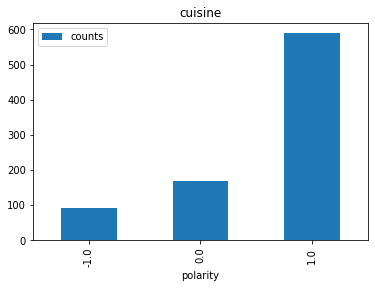

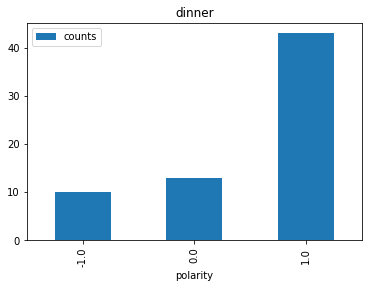

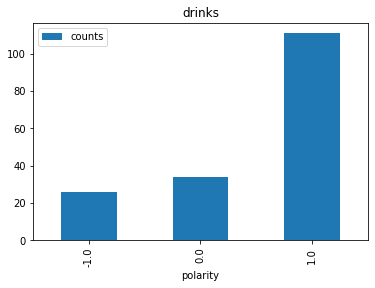

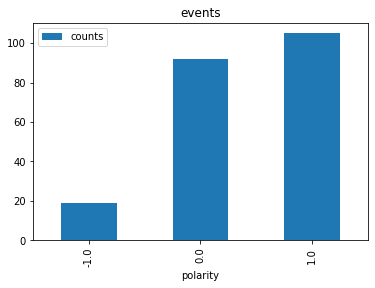

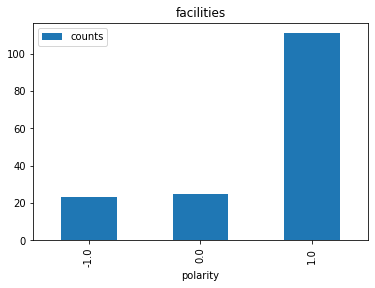

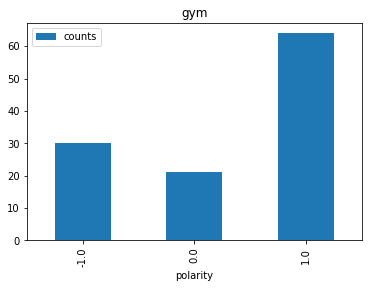

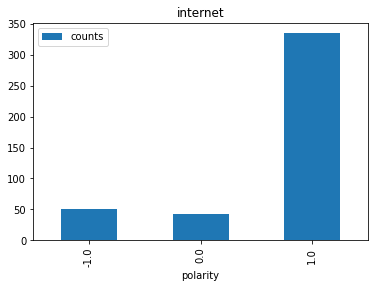

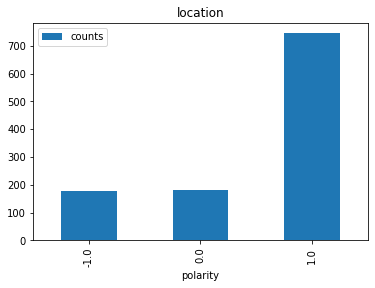

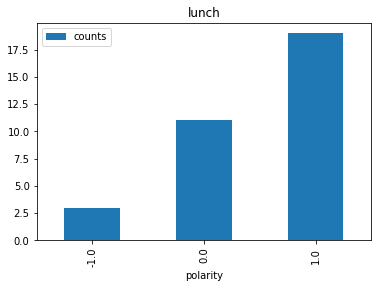

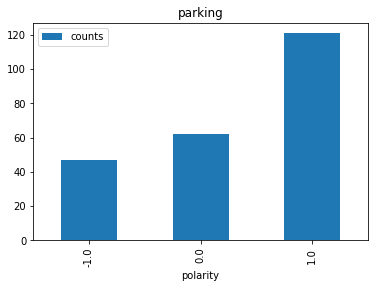

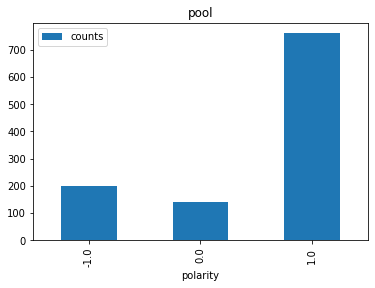

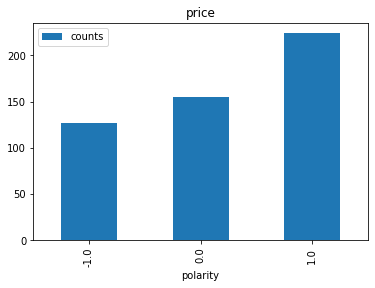

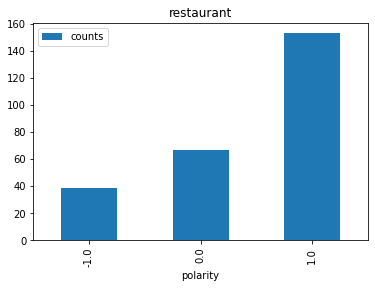

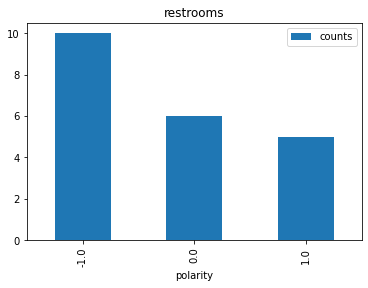

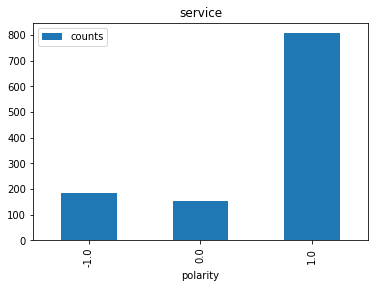

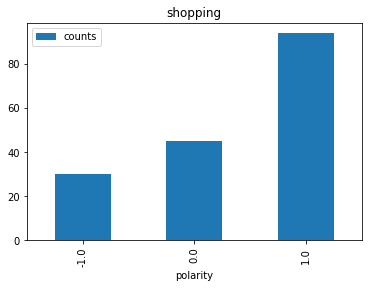

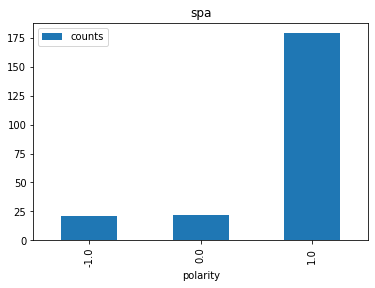

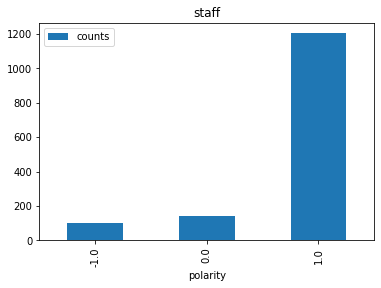

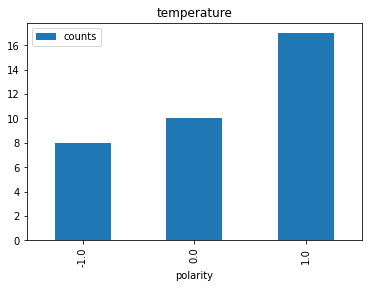

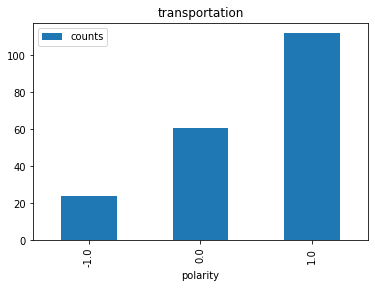

In [28]:
for aspect in aspects_hotels:
    df_aspect_polarity.loc[aspect.upper()].plot.bar(title=aspect)